# 통계분석

In [8]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
from statsmodels.tsa.arima_process import ArmaProcess
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import font_manager, rc

1.&nbsp; 공장에서는 시제품의 농도(%)가 60이라고 주장하며 품질관리팀에서 10개의 샘플을 뽑았다. 유의수준 5%에서 다음을 검정하사오.<br>

(1) 연구가설, 귀무가설을 작성하시오.

비모수 분석의 부호검정 실시<br>
귀무가설: 시제품의 농도는 60이다.<br>
대립가설: 시제품의 농도는 60이 아니다.

(2) 유효한 샘플의 수를 구하시오.

유효한 샘플수는 최소 표본크기를 계산하여 설정. 허용할 수 있는 오차한계와 신뢰수준이 주어졌을 때, 샘플로부터 추정한 표준편차를 사용해 표본의 크기를 구할 수 있음.<br>
오차한계를 5, 신뢰수준을 0.05로 설정한 뒤 샘플의 표준편차를 구함.

In [2]:
x = [52, 50, 62, 75, 26, 45, 62, 35, 57, 14]

moe = 5
a = 0.05
std = np.std(x)
print(std)

17.434448657758008


In [3]:
print((stats.t.ppf(q = .05, df = 9) * std / moe) ** 2)

40.85590828532381


(3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

Wilcoxon의 부호검정을 검정방법으로 선택한다. 이 검정방식은 모집단이 정규성을 만족하지 못할 때 사용하는 검정이며, 비교대상들 사이의 차이를 부호와 크기에 대한 정보로 바꾸어 이를 토대로 분포를 비교하는 방식.

In [4]:
print(stats.wilcoxon(pd.Series(x) - 60))

WilcoxonResult(statistic=np.float64(9.5), pvalue=np.float64(0.072265625))


2.&nbsp; 코로나 시계열 데이터로 다음을 수행하시오.

(1) ACF 사용해서 distancd를 계산하시오.

In [5]:
data_path = '/hdd/data/adp_data/서울특별시 코로나19.csv'
covid = pd.read_csv(data_path, index_col = '날짜')
display(covid.head())

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
날짜,,,,,,,,,,,,,,,,,,,,,
2022-03-30,37261,33753,55376,81018,96008,95433,103288,116862,75118,82254,...,148359,109973,63687,110293,106238,132305,104368,136200,176765,121926
2022-03-29,36216,32835,53872,79030,93474,92993,100255,113609,72934,79677,...,143573,106162,61840,106171,102955,127626,100529,132333,172292,118842
2022-03-28,35276,31878,52391,76802,91030,90277,97419,110583,70754,77878,...,139633,103573,59946,104109,100665,124805,98869,128813,167386,115846
2022-03-27,34879,31577,51652,76108,89876,89302,96359,109500,70003,76542,...,137908,102610,59393,102916,99426,123374,96873,126296,165373,113549
2022-03-26,34061,30903,50720,74178,87770,87345,93690,106437,68329,75119,...,134285,99938,57925,100349,96989,120413,95124,123992,161650,110649


In [ ]:
def acf(x, n_lags):
    return sm.tsa.stattools.acf(x, nlags = n_lags)

n_lags = 785
lag_arr = np.repeat(n_lags, covid.shape[1])
acf_list = list(map(acf, covid.transpose().to_numpy(), lag_arr))
acf_df = pd.DataFrame(acf_list).transpose()
acf_df.columns = covid.columns

acf_df

,종로구,중구,용산구,성동구,광진구,동대문구,중랑구,성북구,강북구,도봉구,...,강서구,구로구,금천구,영등포구,동작구,관악구,서초구,강남구,송파구,강동구
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.965624,0.966025,0.965807,0.964843,0.965118,0.966179,0.964429,0.964386,0.964873,0.964677,...,0.963102,0.964896,0.964495,0.964211,0.964682,0.964599,0.964920,0.965594,0.965216,0.964788
2,0.932172,0.932933,0.932148,0.930035,0.930705,0.932781,0.929547,0.929349,0.930425,0.930168,...,0.927079,0.930870,0.929726,0.929708,0.930160,0.930349,0.931073,0.931913,0.930854,0.930000
3,0.899077,0.900435,0.899075,0.895739,0.896734,0.900063,0.895251,0.894822,0.896665,0.895849,...,0.891603,0.897198,0.895662,0.895164,0.895834,0.896316,0.897017,0.898790,0.897147,0.895648
4,0.865542,0.867391,0.865682,0.860691,0.862274,0.866781,0.860302,0.859554,0.862291,0.861332,...,0.855502,0.862796,0.860914,0.860051,0.860964,0.861660,0.863028,0.865697,0.862857,0.861294
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
780,-0.017175,-0.017212,-0.017232,-0.015171,-0.015231,-0.016054,-0.016019,-0.015739,-0.015857,-0.015638,...,-0.015340,-0.016170,-0.015477,-0.016447,-0.016157,-0.016273,-0.016151,-0.016955,-0.015392,-0.015228
781,-0.013889,-0.013915,-0.013929,-0.012270,-0.012320,-0.012982,-0.012970,-0.012738,-0.012831,-0.012644,...,-0.012420,-0.013083,-0.012523,-0.013303,-0.013069,-0.013163,-0.013059,-0.013717,-0.012449,-0.012334
782,-0.010519,-0.010542,-0.010562,-0.009290,-0.009335,-0.009836,-0.009829,-0.009646,-0.009726,-0.009589,...,-0.009417,-0.009909,-0.009490,-0.010075,-0.009899,-0.009972,-0.009907,-0.010415,-0.009434,-0.009360
783,-0.007108,-0.007135,-0.007144,-0.006282,-0.006309,-0.006655,-0.006652,-0.006522,-0.006586,-0.006479,...,-0.006374,-0.006704,-0.006427,-0.006808,-0.006687,-0.006742,-0.006686,-0.007044,-0.006380,-0.006323


(2) 계층적 군집 분석을 위해 덴드로그램을 작성하시오.

In [7]:
acf_df = acf_df.T
acf_df.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
종로구,1.0,0.965624,0.932172,0.899077,0.865542,0.832363,0.794512,0.761958,0.729971,0.699409,...,-0.032352,-0.029599,-0.026741,-0.023738,-0.020635,-0.017175,-0.013889,-0.010519,-0.007108,-0.003608
중구,1.0,0.966025,0.932933,0.900435,0.867391,0.834610,0.796898,0.764614,0.733020,0.702617,...,-0.032460,-0.029706,-0.026830,-0.023818,-0.020699,-0.017212,-0.013915,-0.010542,-0.007135,-0.003619
용산구,1.0,0.965807,0.932148,0.899075,0.865682,0.832234,0.798381,0.765454,0.733336,0.702647,...,-0.032290,-0.029516,-0.026637,-0.023616,-0.020484,-0.017232,-0.013929,-0.010562,-0.007144,-0.003624
성동구,1.0,0.964843,0.930035,0.895739,0.860691,0.826010,0.789577,0.755252,0.721447,0.689063,...,-0.028496,-0.026046,-0.023505,-0.020839,-0.018086,-0.015171,-0.012270,-0.009290,-0.006282,-0.003182
광진구,1.0,0.965118,0.930705,0.896734,0.862274,0.828063,0.793461,0.759914,0.727410,0.696133,...,-0.028500,-0.026029,-0.023499,-0.020853,-0.018098,-0.015231,-0.012320,-0.009335,-0.006309,-0.003199


In [9]:
font_path = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

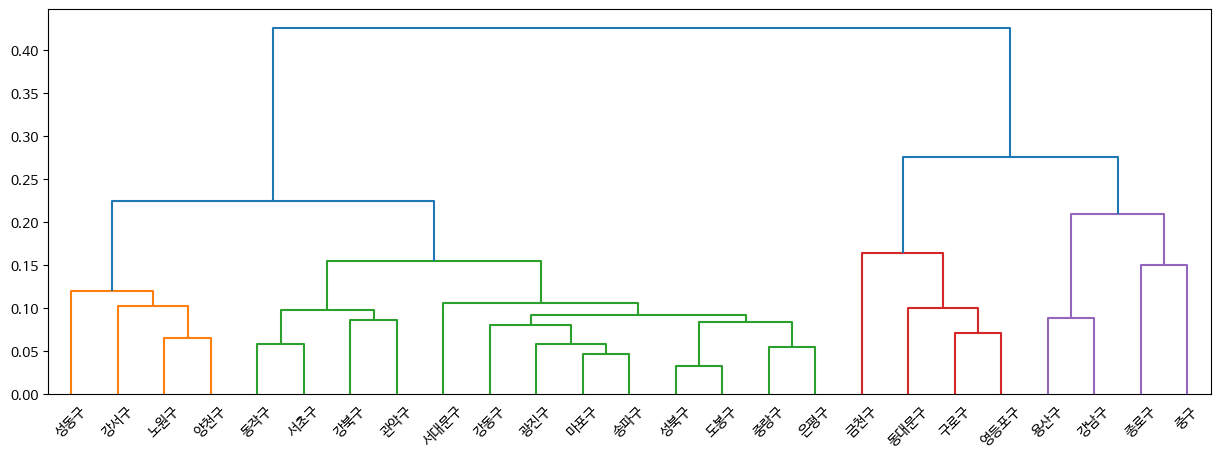

In [10]:
plt.figure(figsize = (15, 5))
label = acf_df.index
dend1 = sch.linkage(acf_df, method = 'average')
cutoff = 0.5 * max(dend1[:, 2])
dend_res1 = sch.dendrogram(dend1, color_threshold = cutoff, labels = label)
plt.show()

3.&nbsp; 사회과학, 자연과학, 공학 세 개 학과의 평점조사표를 보고 학과와 성적이 관계있는지 검정하시오.

In [13]:
사회 = [16, 30, 12]
자연 = [12, 20, 3]
공학 = [18, 13, 14]
table = pd.DataFrame(
    {'사회과학': 사회, '자연과학': 자연, '공학': 공학},
    index = ['3.5~4.5', '2.5~3.5', '1.5~2.5']
)
display(table)

,사회과학,자연과학,공학
3.5~4.5,16,12,18
2.5~3.5,30,20,13
1.5~2.5,12,3,14


(1) 연구가설, 귀무가설을 작성하시오.

귀무가설: 성적과 학과 간에는 관련성이 없다.<br>
대립가설: 성적과 학과 간에는 관련성이 있다.

(2) 학과와 성적이 독립일 때 기댓값을 구하시오.

expected_freq=array([[19.33333333, 11.66666667, 15.        ],<br>
       [26.47826087, 15.97826087, 20.54347826],<br>
       [12.1884058 ,  7.35507246,  9.45652174]]))

(3) 검정통계량을 구하고 연구가설 채택 여부를 작성하시오.

In [16]:
print(stats.chi2_contingency(observed = table))

Chi2ContingencyResult(statistic=np.float64(10.199441509990177), pvalue=np.float64(0.03719883770303157), dof=4, expected_freq=array([[19.33333333, 11.66666667, 15.        ],
       [26.47826087, 15.97826087, 20.54347826],
       [12.1884058 ,  7.35507246,  9.45652174]]))
